In [1]:
import fastai
from fastai import *          # Quick access to most common functionality
from fastai.vision import *   # Quick access to computer vision functionality
from fastai.layers import Lambda
from fastai.callbacks import SaveModelCallback
import pytorch_ssim as ssim
from superres import *

In [2]:
path = Path('/DATA/WAMRI/salk/uri/Image_restoration_data/')
train_lr = path/'train_LR'
train_hr = path/'train_HR'
test_lr = path/'test_LR'
test_hr = path/'test_HR'

In [3]:
def pull_id(fn):
    return fn.split('#')[-1].split('.')[0]

def match_hr_fn(x):
    return hr_names_by_id[pull_id(x.name)]

lr_names_full = list(train_lr.glob('*.tif'))
lr_names_full.sort()
hr_names_by_id = {pull_id(hrfn.name):hrfn for hrfn in train_hr.glob('*.tif')}
test_label = list(hr_names_by_id.values())[0]

In [4]:
src = (GrayImageItemList
       .from_folder(train_lr, '*.tif', label_class=GrayImageItemList)
       .split_by_valid_func(lambda x: x.stem[-3] == '0')
       .label_from_func(match_hr_fn))

In [5]:
scale=4
n_resblocks=16
n_feats=128
res_scale= 1.
model = WDSR(scale, n_resblocks, n_feats, res_scale, n_colors=1)
model = nn.DataParallel(model) #.eval().cuda()

In [6]:
sz_lr = 72
scale,bs = 4,24
sz_hr = sz_lr*scale
loss = combo_edge_mse
#loss=feat_proj_loss
#loss=combo2

In [ ]:
# learn = build_learner(model, bs, sz_lr, sz_hr, src, loss=loss)
# learn.lr_find()
# learn.recorder.plot()

Total time: 02:10
epoch  train_loss  valid_loss  mse_loss  edge_loss  ssim  psnr          
1      0.289755    0.134801    0.010503  0.124297   -0.109104  19.787975  (00:18)
2      0.201900    0.107982    0.007521  0.100461   0.641639  21.238810   (00:12)
3      0.166339    0.105406    0.007307  0.098098   0.703326  21.368599   (00:12)
4      0.149767    0.106106    0.007844  0.098262   0.424617  21.056192   (00:12)
5      0.140983    0.105245    0.007395  0.097849   0.643427  21.312756   (00:12)
6      0.136644    0.105485    0.007730  0.097755   0.408189  21.120602   (00:12)
7      0.132559    0.104787    0.007244  0.097543   0.535963  21.403931   (00:12)
8      0.130431    0.104595    0.007172  0.097423   0.691483  21.446346   (00:12)
9      0.129238    0.104499    0.007174  0.097324   0.689485  21.445272   (00:12)
10     0.128871    0.104493    0.007154  0.097340   0.712090  21.458265   (00:12)

load: wdsr_1.0


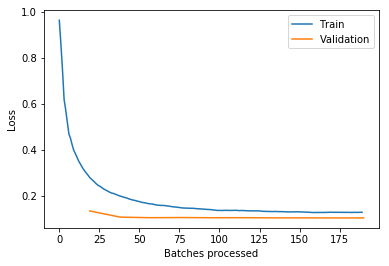

In [7]:
epochs, lr = 10, 2e-3
learn = batch_learn(model, bs, sz_lr, sz_hr, lr, epochs, src, save='wdsr_1.0', loss=loss)

In [9]:
torch.save(learn.model.module, "/home/fredmonroe/wdsr_model_1")

Total time: 11:31
epoch  train_loss  valid_loss  mse_loss  edge_loss  ssim  psnr          
1      0.075128    0.058822    0.005933  0.052889   0.736794  22.267883   (00:22)
2      0.075523    0.058304    0.005863  0.052440   0.740910  22.319448   (00:22)
3      0.076058    0.060808    0.006306  0.054503   0.558828  22.003065   (00:23)
4      0.076584    0.059106    0.005996  0.053110   0.735403  22.221590   (00:23)
5      0.077284    0.060271    0.006186  0.054085   0.457916  22.086874   (00:23)
6      0.076793    0.058851    0.006136  0.052714   0.321487  22.122684   (00:22)
7      0.076624    0.058479    0.005959  0.052520   0.720334  22.252390   (00:23)
8      0.077058    0.059991    0.006884  0.053107   -0.075359  21.621395  (00:23)
9      0.076551    0.058165    0.006007  0.052157   0.610056  22.214876   (00:22)
10     0.077820    0.058556    0.005764  0.052791   0.722307  22.393171   (00:23)
11     0.077633    0.059013    0.006168  0.052845   0.719586  22.098721   (00:23)
12     

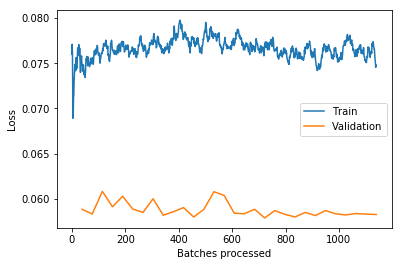

In [11]:
sz_lr = 128
scale,bs = 4,12
sz_hr = sz_lr*scale
epochs, lr = 30, 1e-4
learn = batch_learn(model, bs, sz_lr, sz_hr, lr, epochs, src, load='wdsr_1.0_best', save='wdsr_1.1', loss=loss)

In [14]:
learn = learn.load('wdsr_1.1')
torch.save(learn.model.module,'/home/fredmonroe/wdsr_model_1.1')

Total time: 1:03:22
epoch  train_loss  valid_loss  mse_loss  edge_loss  ssim  psnr          
1      0.042537    0.027509    0.006690  0.020819   0.171690  21.779728   (01:16)
2      0.043009    0.027533    0.006513  0.021020   0.266782  21.889574   (01:16)
3      0.042374    0.028176    0.006578  0.021598   0.506844  21.832365   (01:16)
4      0.042371    0.027449    0.006170  0.021280   0.716798  22.111729   (01:16)
5      0.041972    0.026947    0.006292  0.020655   0.653145  22.026308   (01:16)
6      0.040660    0.028959    0.007427  0.021532   -0.131859  21.306541  (01:16)
7      0.041554    0.028480    0.006367  0.022113   0.734241  21.970894   (01:16)
8      0.042211    0.027448    0.006443  0.021005   0.610712  21.943056   (01:16)
9      0.043217    0.029456    0.006738  0.022718   0.535792  21.739222   (01:16)
10     0.043559    0.030041    0.008027  0.022014   -0.194749  20.969500  (01:16)
11     0.043542    0.027693    0.006774  0.020919   0.094990  21.711657   (01:16)
12   

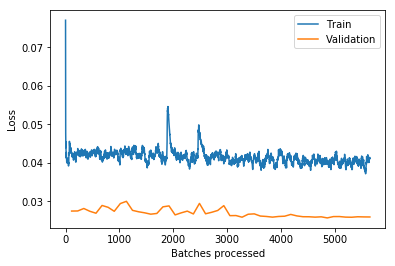

In [15]:
sz_lr = 256
scale,bs = 4,4
sz_hr = sz_lr*scale
epochs, lr = 50, 1e-3
learn = batch_learn(model, bs, sz_lr, sz_hr, lr, epochs, src, load='wdsr_1.1', save='wdsr_1.2', loss=loss)

In [16]:
learn = learn.load('wdsr_1.2')
torch.save(learn.model.module,'/home/fredmonroe/wdsr_model_1.2')

Total time: 1:03:18
epoch  train_loss  valid_loss  mse_loss  edge_loss  ssim  psnr         
1      0.040664    0.025761    0.005747  0.020014   0.739248  22.414845  (01:15)
2      0.040957    0.025911    0.005853  0.020058   0.736396  22.335588  (01:16)
3      0.039204    0.025883    0.005811  0.020072   0.762089  22.368454  (01:15)
4      0.040603    0.025996    0.005836  0.020160   0.756827  22.348604  (01:15)
5      0.040527    0.025906    0.005807  0.020100   0.762214  22.369608  (01:15)
6      0.041301    0.025883    0.005804  0.020079   0.728670  22.373083  (01:16)
7      0.041094    0.026118    0.005938  0.020180   0.721230  22.273689  (01:15)
8      0.040003    0.026098    0.005880  0.020218   0.716448  22.314285  (01:15)
9      0.040790    0.025894    0.005812  0.020083   0.737127  22.368843  (01:15)
10     0.040149    0.025897    0.005780  0.020117   0.711429  22.389143  (01:16)
11     0.040717    0.026174    0.005950  0.020224   0.755992  22.263613  (01:15)
12     0.039812  

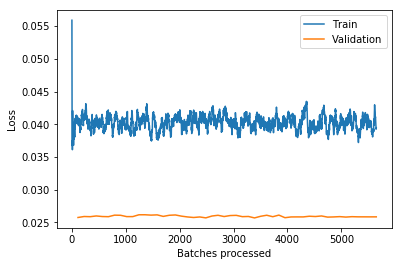

In [17]:
sz_lr = 256
scale,bs = 4,4
sz_hr = sz_lr*scale
epochs, lr = 50, 1e-4
learn = batch_learn(model, bs, sz_lr, sz_hr, lr, epochs, src, load='wdsr_1.2', save='wdsr_1.3', loss=loss)

In [18]:
learn = learn.load('wdsr_1.3')
torch.save(learn.model.module,'/home/fredmonroe/wdsr_model_1.3')

In [19]:
learn = learn.load('wdsr_1.3_best')
torch.save(learn.model.module,'/home/fredmonroe/wdsr_model_1.3_best')

In [20]:
learn = learn.load('wdsr_1.3_best')

In [21]:
sz_lr = 506
scale,bs = 4,1
sz_hr = sz_lr*scale
data = get_data(src, bs, sz_lr, sz_hr)
learn = Learner(data, model, loss_func=F.mse_loss)
preds, ys = learn.get_preds(DatasetType.Valid)
preds = torch.clamp(preds, 0.,1.)

In [22]:
idx = 9
ys[idx].std(), preds[idx].std()

(tensor(0.1141), tensor(0.0876))

In [23]:
preds[idx].min(),preds[idx].max()

(tensor(0.), tensor(0.7613))

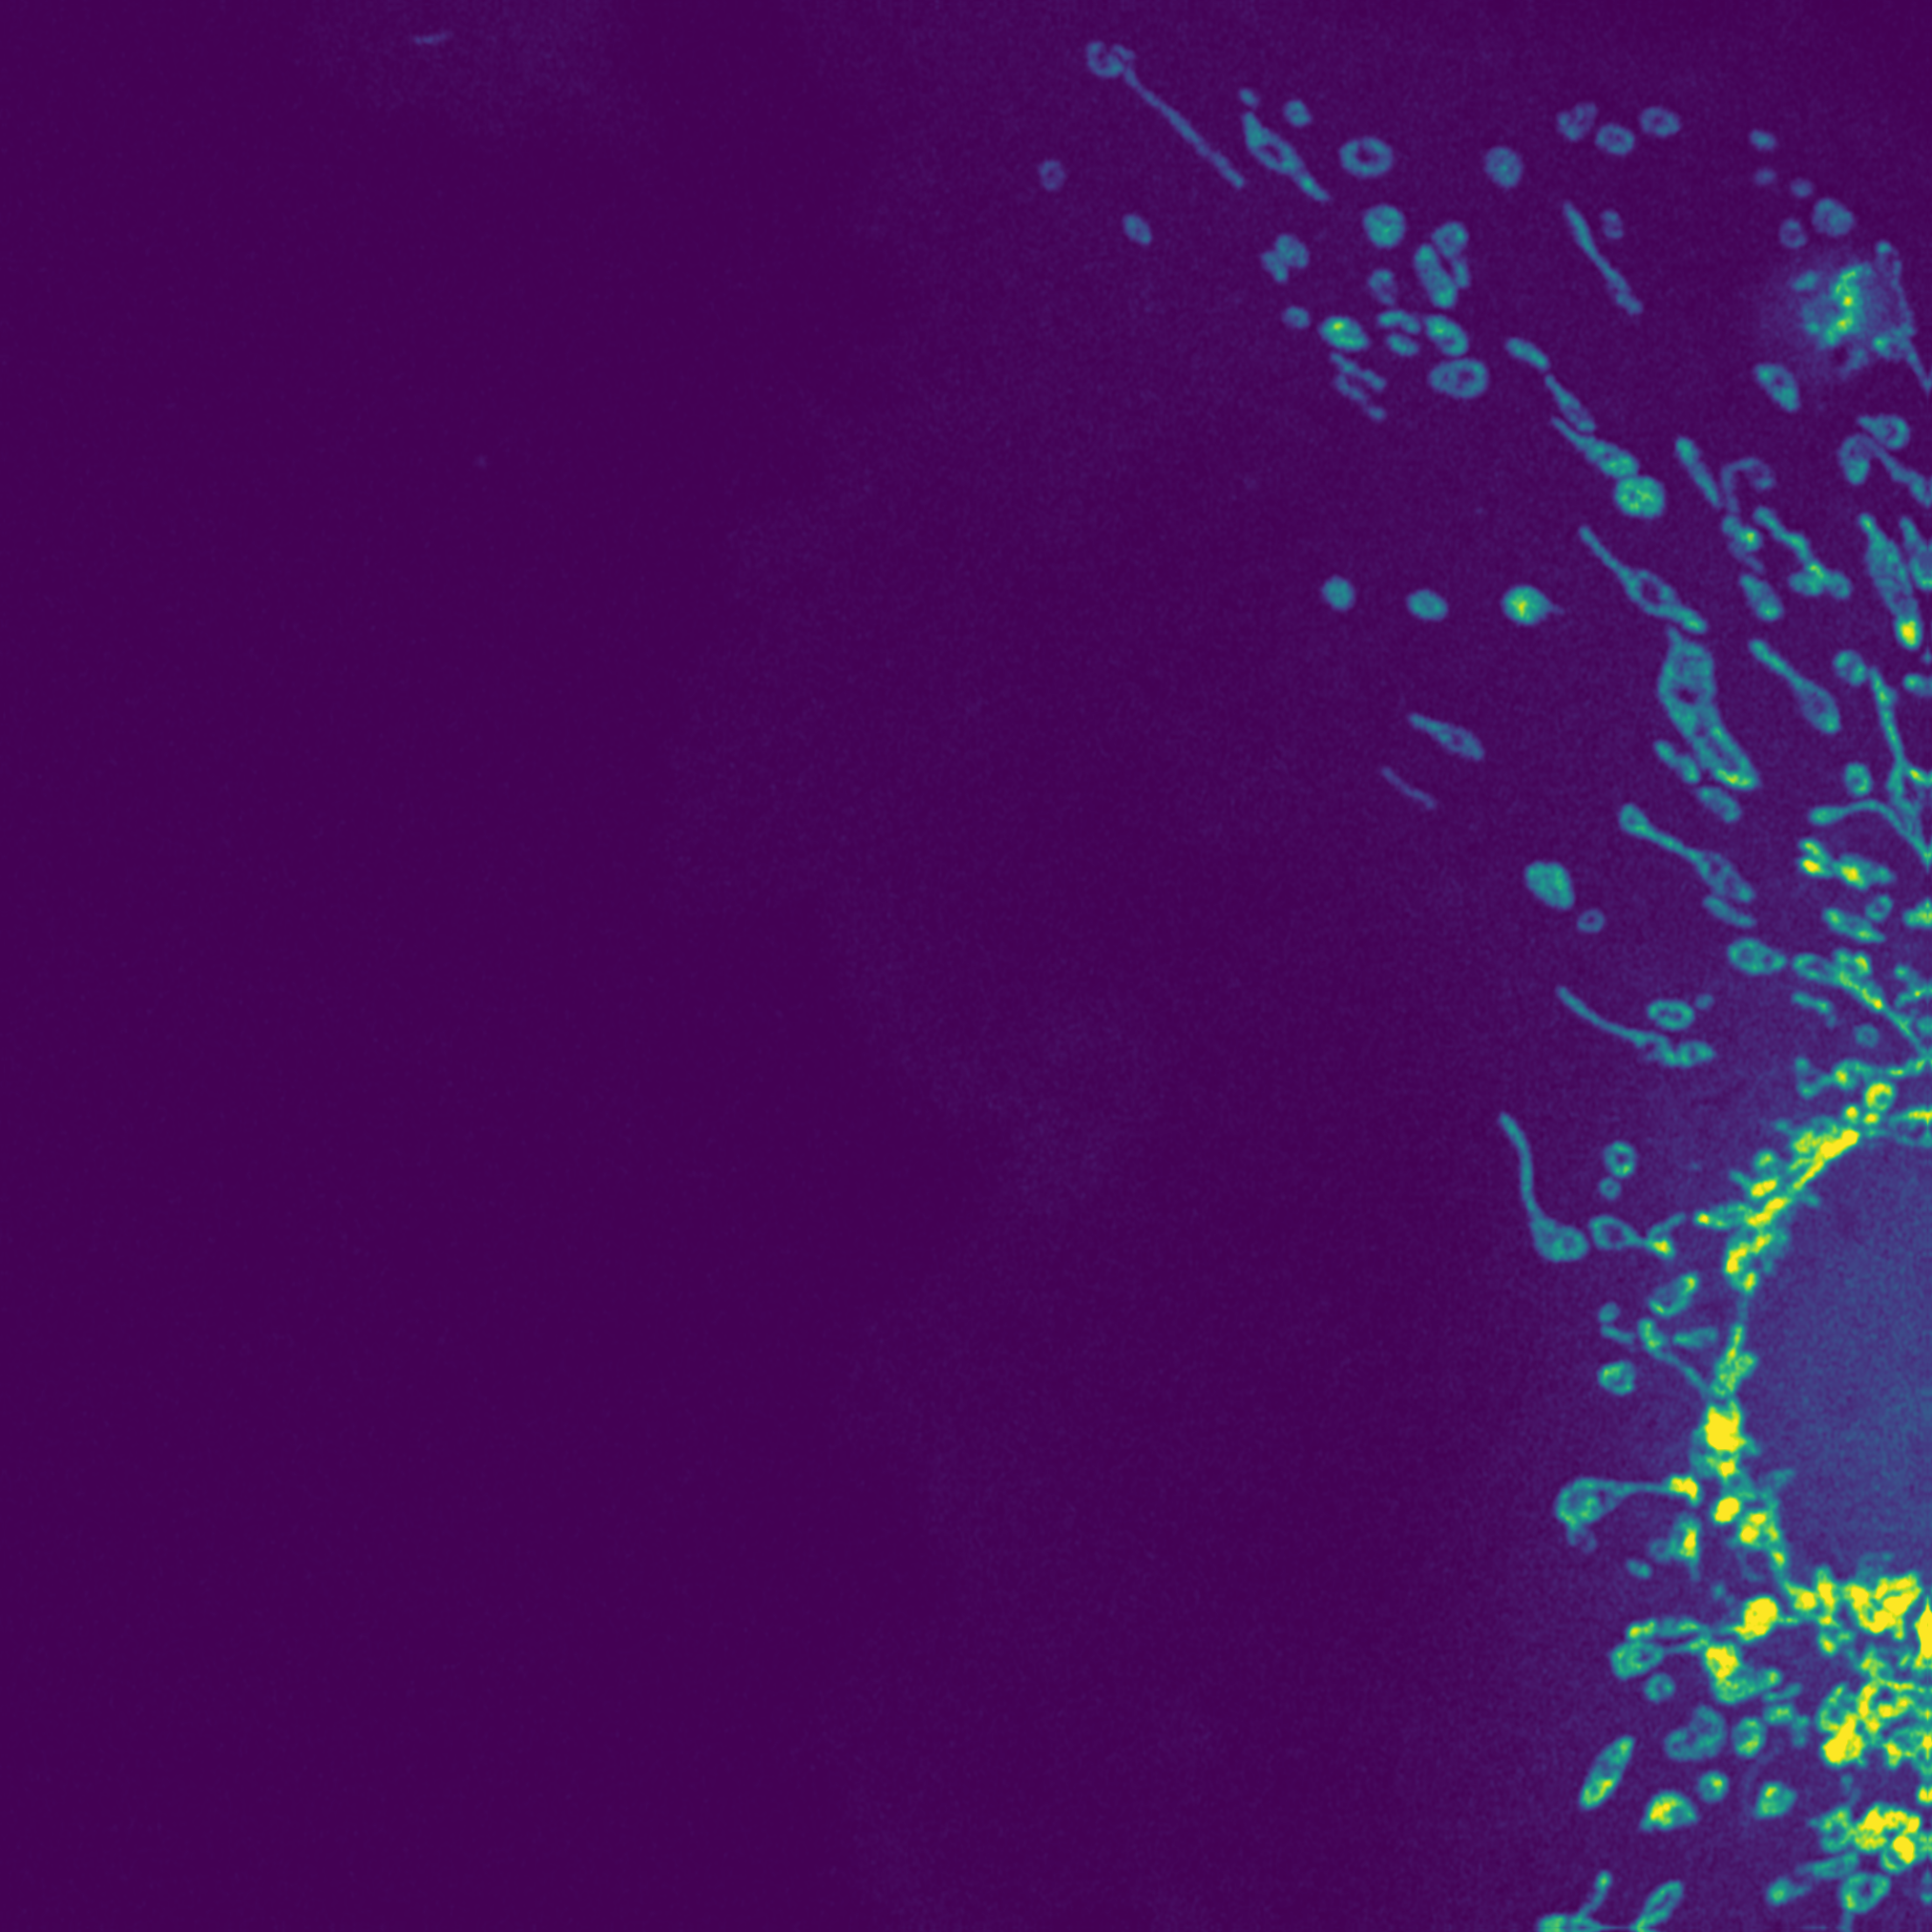

In [24]:
hr = Image(ys[idx])
hr

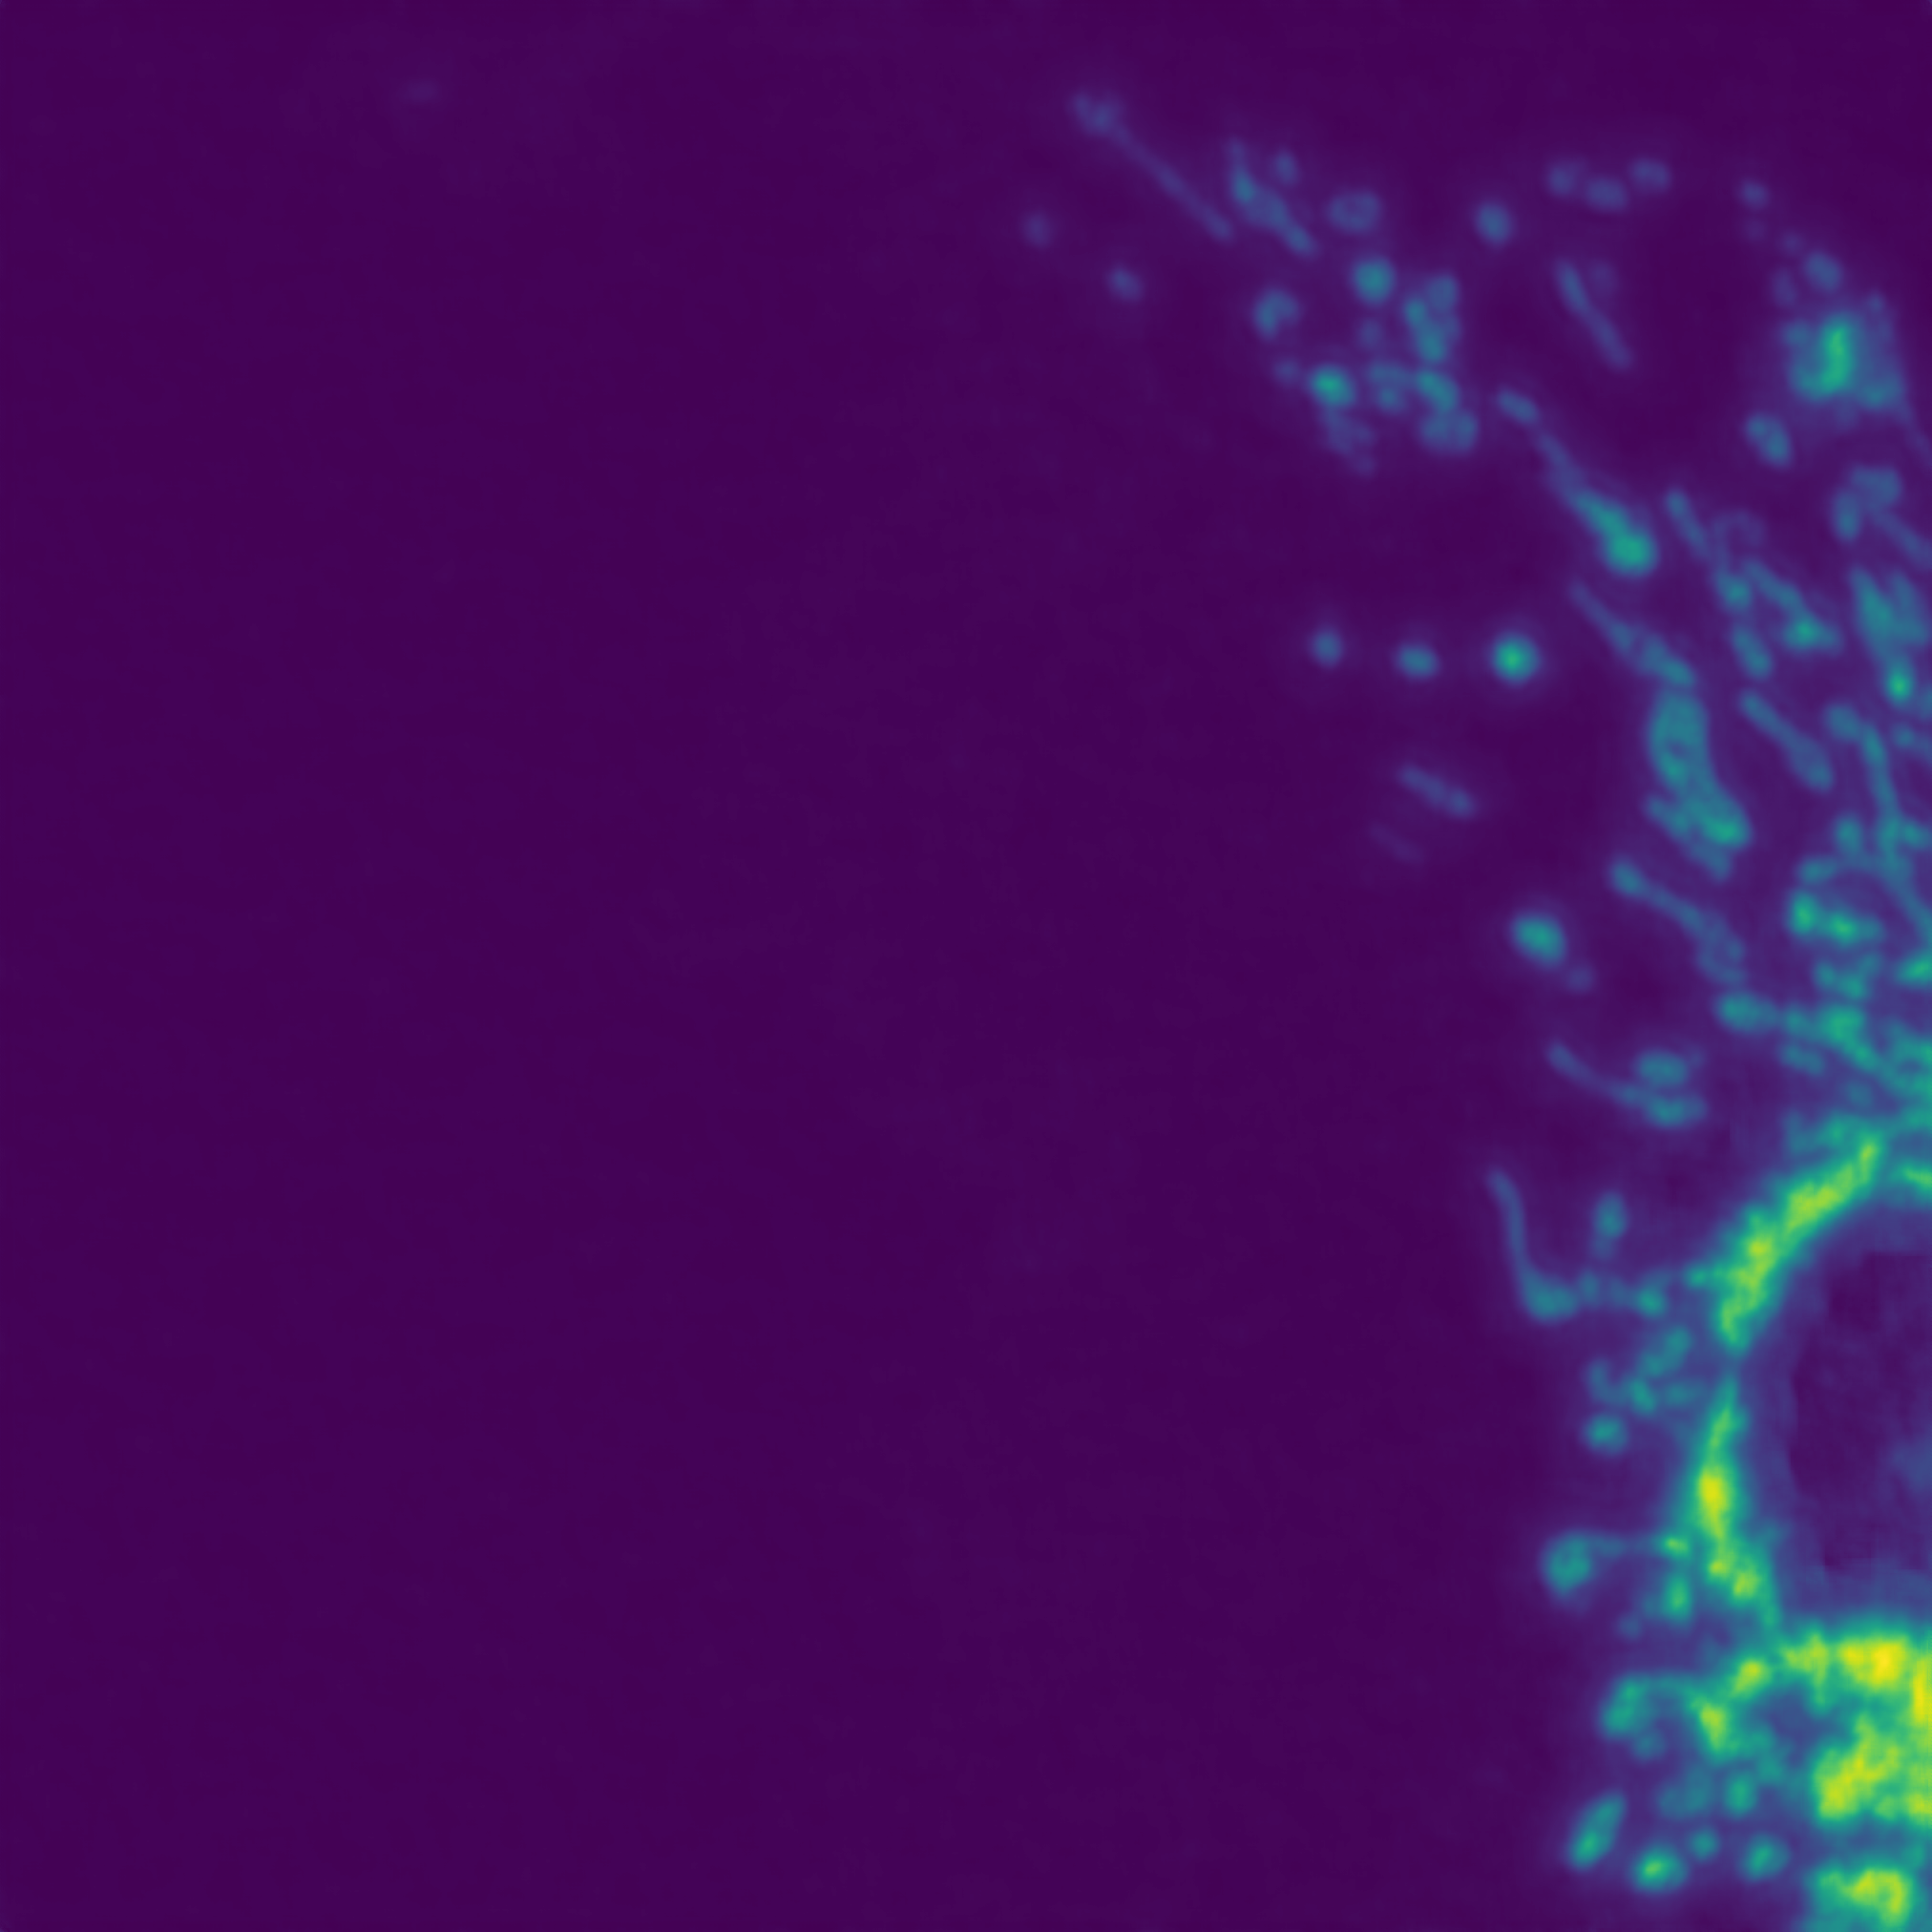

In [25]:
sr = Image(preds[idx])
sr

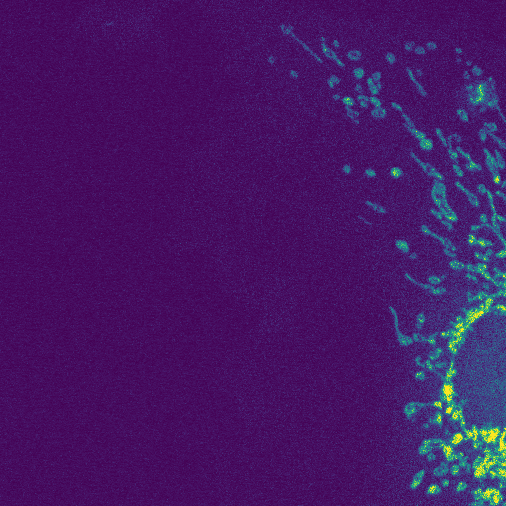

In [26]:
lr = learn.data.valid_ds[idx][0]
lr

In [27]:
ssim.ssim(sr.data[None],hr.data[None]), psnr(sr.data[None],hr.data[None]), F.mse_loss(sr.data[None],hr.data[None])

(tensor(0.7959), tensor(20.7925), tensor(0.0083))

In [28]:
learn.save('wdsr')

In [29]:
learn = learn.load('wdsr')

In [30]:
trn_tfm, val_tfm = get_transforms()
test_bs = 2
test_sz = 512 
test_out_sz = 4*test_sz
test_data = get_data(src, test_bs, test_sz, test_out_sz, test_folder=path/'newimg')
test_learn = Learner(test_data, model, loss_func=F.mse_loss).load('wdsr')

NameError: name 'test_label' is not defined

In [ ]:
test_preds, ys = test_learn.get_preds(DatasetType.Test)
test_preds = torch.clamp(test_preds, 0.,1.)

In [ ]:
sr_imgs = []
for idx in range(test_preds.shape[0]):
    img = Image(test_preds[idx])
    sr_imgs.append(img)

In [ ]:
sr_imgs[1]

In [ ]:
sr_imgs[0]

In [ ]:
test_learn.save('wdsr_keep_edge3')

In [ ]:
test_learn.save('wdsr_keep_edge3')